In [1]:
import contextily as ctx
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
CRS ='epsg:2056'
WEB_MERCATOR_CRS = 'epsg:3857'
STATION_LABEL_MAP = {
    'BOVDCH': 'Chandel M/13',
    'BOVDMR': 'Morges',
    'BOVDSO': 'Sorges',
    'NABLAU': 'Lausanne César-Roux',
    'PUY': 'Pully',
    'WSLLAB': 'Lausanne Bestand',
    'WSLLAF': 'Lausanne Freiland',
    'VD_Lausanne_PdL': 'Lausanne Plaines-du-Loup',
    'VD_Bussigny': 'Bussigny',
    'VD_Morges': 'Morges',
    'BOURG-EN-LAVAUX': 'Bourg-en-Lavaux',
    'MARCELIN': 'Marcelin',
    'PULLY': 'Pully'
}

station_locations_filepath = '../data/raw/stations/station-locations.csv'

In [3]:
station_location_df = pd.read_csv(station_locations_filepath)

# ACHTUNG: ugly hardcoded - set the two Pully stations more apart so that two
# points can be seen in the map
station_location_df.loc[4, 'x'] = station_location_df.loc[4, 'x'] + 50
station_location_df.loc[4, 'y'] = station_location_df.loc[4, 'y'] - 100
station_location_df.loc[11, 'x'] = station_location_df.loc[11, 'x'] - 50
station_location_df.loc[11, 'y'] = station_location_df.loc[11, 'y'] + 100

# create geo data frame
station_gdf = gpd.GeoDataFrame(
    station_location_df[station_location_df.drop(['x', 'y'], axis=1).columns],
    geometry=gpd.points_from_xy(station_location_df['x'],
                                station_location_df['y']),
    crs=CRS).to_crs(WEB_MERCATOR_CRS)

# add labels
# + ' (' + station_gdf['src'] + '), ' + station_gdf['alt'].astype(str) + ' m'
station_gdf['label'] = station_gdf['stn'].replace(STATION_LABEL_MAP)
# ACHTUNG: ugly hardcoded - add the operator to distinguish the two Pully and
# the two Morges station labels
for i in 1, 4, 8, 11:
    station_gdf.loc[i, 'label'] = station_gdf.loc[
        i, 'label'] + f" ({station_gdf.loc[i, 'src']})"

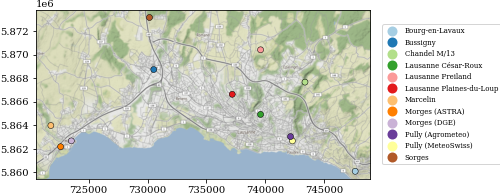

In [4]:
# set black edge color for markers
plt.rcParams.update(**{'scatter.edgecolors': 'k'})

ax = station_gdf.plot(
    column='label',
    cmap='Paired',
    linewidths=.5,
    legend=True,
    legend_kwds={
        'fontsize': 7,
        'fancybox': True,
        'loc': 'center right',
        'bbox_to_anchor': (1.4, 0.5)
    })

ctx.add_basemap(ax, attribution=False)
ax.figure.savefig('../reports/figures/monitoring-stations.png')